# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1

Use the Monte Carlo NVT code we have provided to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, and pressure, $P$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ and $P$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ and $P$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

Gli scrip python usati per calcolare le autocorrelazioni e le incertezze statistiche sono in fondo al notebook; ho salvato gli output in file, che si trovano in questa cartella, quindi ho reso i codici dei commenti in modo che non vengano rieseguiti alla riapertura e non facciano perdere tempo.

### Fit dell'autocorrelazione di U/N e P allo stato solido

C:\Users\Alessandro\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


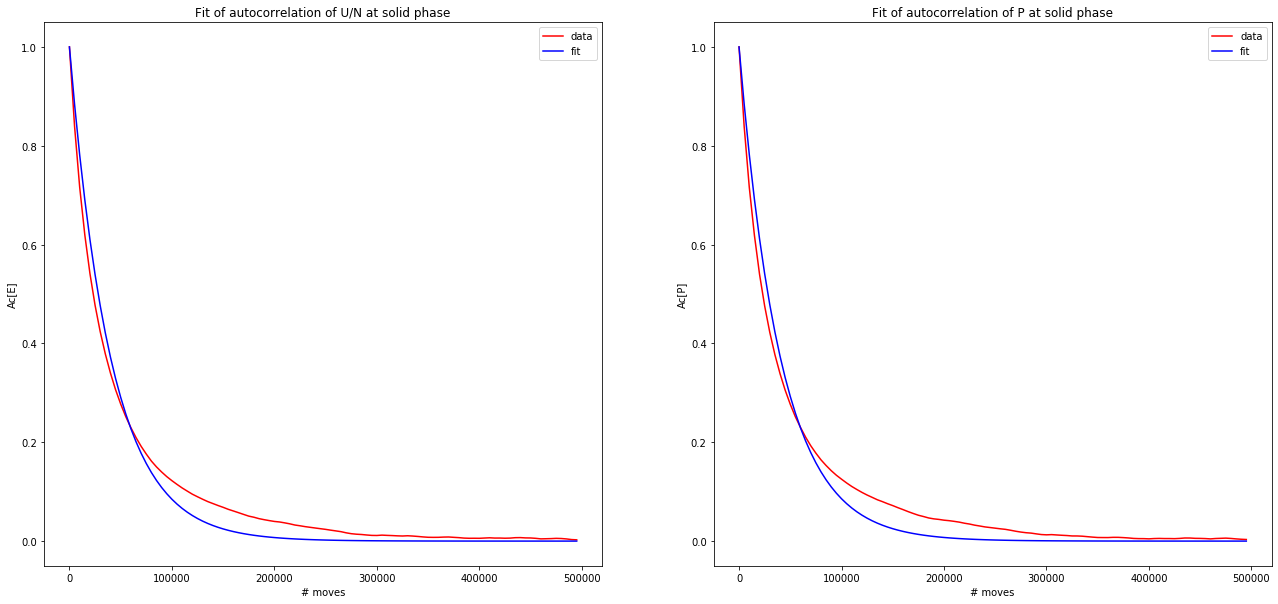

8.100557421698896
8.139452629194457


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import statsmodels.tsa.stattools as stat
import math

AEsolid = np.loadtxt("Autocorrelazioni/Autocorr_ene_solid.dat").T
APsolid = np.loadtxt("Autocorrelazioni/Autocorr_pres_solid.dat").T
AEliquid = np.loadtxt("Autocorrelazioni/Autocorr_ene_liquid.dat").T
APliquid = np.loadtxt("Autocorrelazioni/Autocorr_pres_liquid.dat").T
AEgas = np.loadtxt("Autocorrelazioni/Autocorr_ene_gaseous.dat").T
APgas = np.loadtxt("Autocorrelazioni/Autocorr_pres_gaseous.dat").T

x = np.arange(0,100)

def f(x,t,A):
    return np.exp(-x/t)

ESp_opt, ESp_cov = curve_fit(f,x,AEsolid[1])
AcES_fit = f(x, ESp_opt[0], ESp_opt[1])

PSp_opt, PSp_cov = curve_fit(f,x,APsolid[1])
AcPS_fit = f(x, PSp_opt[0], PSp_opt[1])

plt.figure(figsize=[22,10])
plt.subplot(1,2,1)
plt.plot(AEsolid[0], AEsolid[1], 'r', label='data')
plt.plot(AEsolid[0], AcES_fit, 'b', label='fit')
plt.legend()
plt.xlabel('# moves')
plt.ylabel('Ac[E]')
plt.title('Fit of autocorrelation of U/N at solid phase')
plt.subplot(1,2,2)
plt.plot(APsolid[0], APsolid[1], 'r', label='data')
plt.plot(APsolid[0], AcPS_fit, 'b', label='fit')
plt.legend()
plt.xlabel('# moves')
plt.ylabel('Ac[P]')
plt.title('Fit of autocorrelation of P at solid phase')
plt.show()

print(ESp_opt[0])
print(PSp_opt[0])

### Fit dell'autocorrelazione di U/N e P allo stato liquido

C:\Users\Alessandro\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


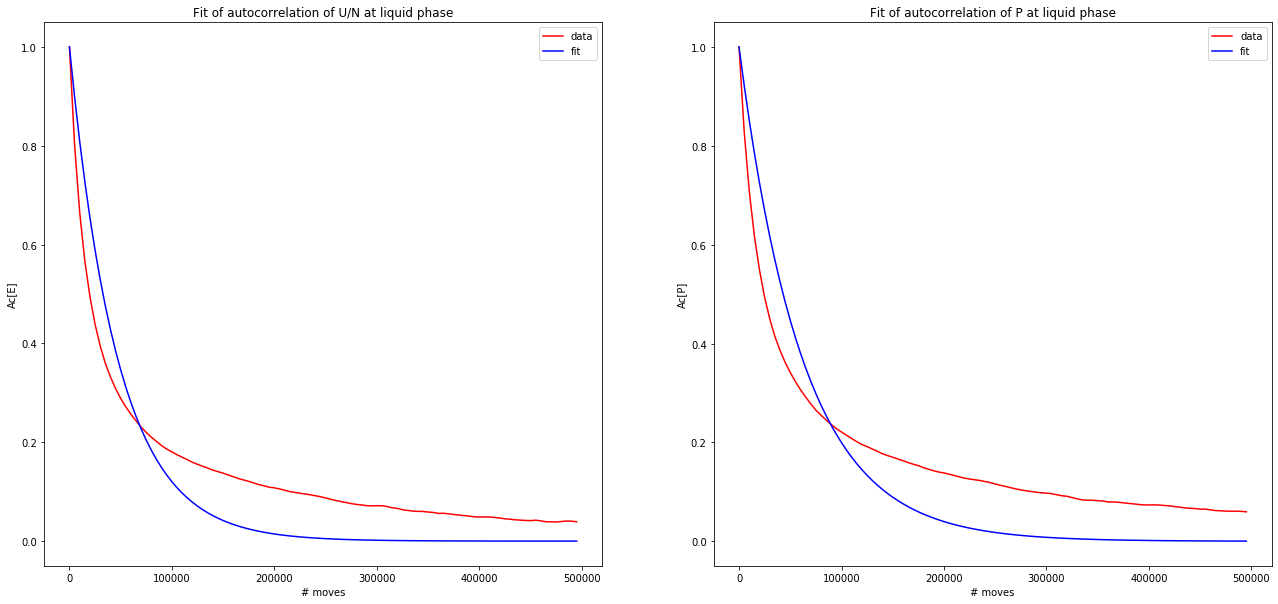

9.437063940739433
12.407044283305549


In [2]:
ELp_opt, ELp_cov = curve_fit(f,x,AEliquid[1])
AcEL_fit = f(x, ELp_opt[0], ELp_opt[1])

PLp_opt, PLp_cov = curve_fit(f,x,APliquid[1])
AcPL_fit = f(x, PLp_opt[0], PLp_opt[1])

plt.figure(figsize=[22,10])
plt.subplot(1,2,1)
plt.plot(AEliquid[0], AEliquid[1], 'r', label='data')
plt.plot(AEliquid[0], AcEL_fit, 'b', label='fit')
plt.legend()
plt.xlabel('# moves')
plt.ylabel('Ac[E]')
plt.title('Fit of autocorrelation of U/N at liquid phase')
plt.subplot(1,2,2)
plt.plot(APliquid[0], APliquid[1], 'r', label='data')
plt.plot(APliquid[0], AcPL_fit, 'b', label='fit')
plt.legend()
plt.xlabel('# moves')
plt.ylabel('Ac[P]')
plt.title('Fit of autocorrelation of P at liquid phase')
plt.show()

print(ELp_opt[0])
print(PLp_opt[0])

### Fit dell'autocorrelazione di U/N e P allo stato gassoso

C:\Users\Alessandro\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


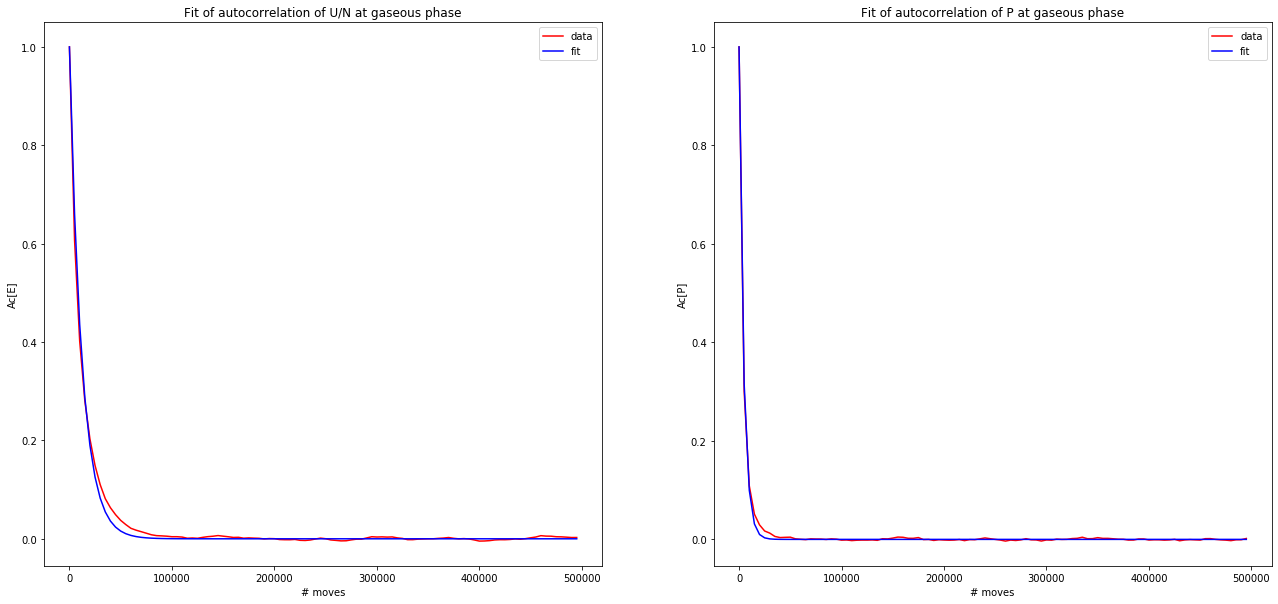

2.4075263575608865
0.8671577546966427


In [3]:
EGp_opt, EGp_cov = curve_fit(f,x,AEgas[1])
AcEG_fit = f(x, EGp_opt[0], EGp_opt[1])

PGp_opt, PGp_cov = curve_fit(f,x,APgas[1])
AcPG_fit = f(x, PGp_opt[0], PGp_opt[1])

plt.figure(figsize=[22,10])
plt.subplot(1,2,1)
plt.plot(AEgas[0], AEgas[1], 'r', label='data')
plt.plot(AEgas[0], AcEG_fit, 'b', label='fit')
plt.legend()
plt.xlabel('# moves')
plt.ylabel('Ac[E]')
plt.title('Fit of autocorrelation of U/N at gaseous phase')
plt.subplot(1,2,2)
plt.plot(APgas[0], APgas[1], 'r', label='data')
plt.plot(APgas[0], AcPG_fit, 'b', label='fit')
plt.legend()
plt.xlabel('# moves')
plt.ylabel('Ac[P]')
plt.title('Fit of autocorrelation of P at gaseous phase')
plt.show()

print(EGp_opt[0])
print(PGp_opt[0])

### Andamento dell'incertezza sull'energia interna

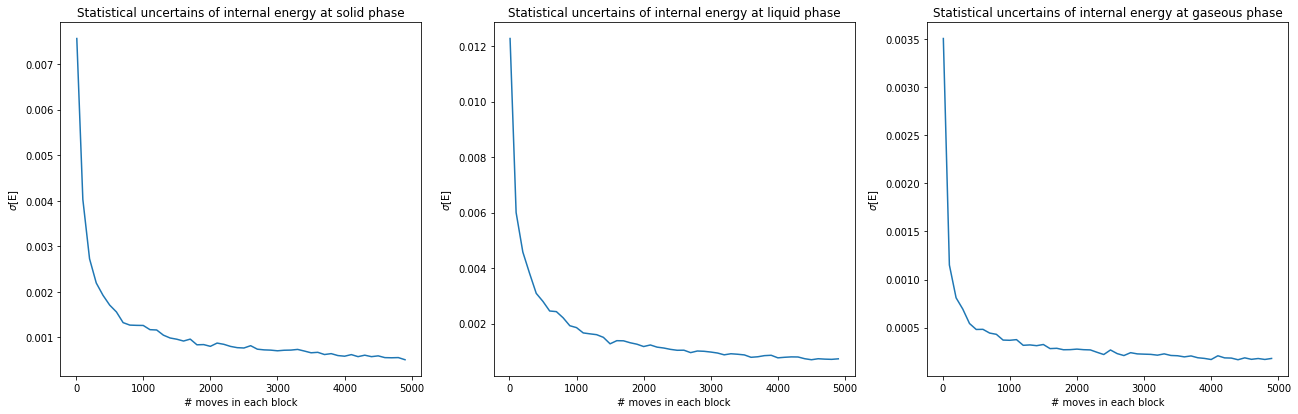

In [4]:
sigmaES = np.loadtxt('Incertezze/Uncertain_ene_solid.dat')
sigmaEL = np.loadtxt('Incertezze/Uncertain_ene_liquid.dat')
sigmaEG = np.loadtxt('Incertezze/Uncertain_ene_gaseous.dat')
sigmaPS = np.loadtxt('Incertezze/Uncertain_pres_solid.dat')
sigmaPL = np.loadtxt('Incertezze/Uncertain_pres_liquid.dat')
sigmaPG = np.loadtxt('Incertezze/Uncertain_pres_gaseous.dat')

L = np.arange(0,5000,100)
L[0] = 10

plt.figure(figsize=[22,6.5])
plt.subplot(1,3,1)
plt.plot(L, sigmaES)
plt.xlabel('# moves in each block')
plt.ylabel('$\sigma$[E]')
plt.title('Statistical uncertains of internal energy at solid phase')
plt.subplot(1,3,2)
plt.plot(L, sigmaEL)
plt.xlabel('# moves in each block')
plt.ylabel('$\sigma$[E]')
plt.title('Statistical uncertains of internal energy at liquid phase')
plt.subplot(1,3,3)
plt.plot(L, sigmaEG)
plt.xlabel('# moves in each block')
plt.ylabel('$\sigma$[E]')
plt.title('Statistical uncertains of internal energy at gaseous phase')
plt.show()

### Andamento dell'incertezza sulla pressione

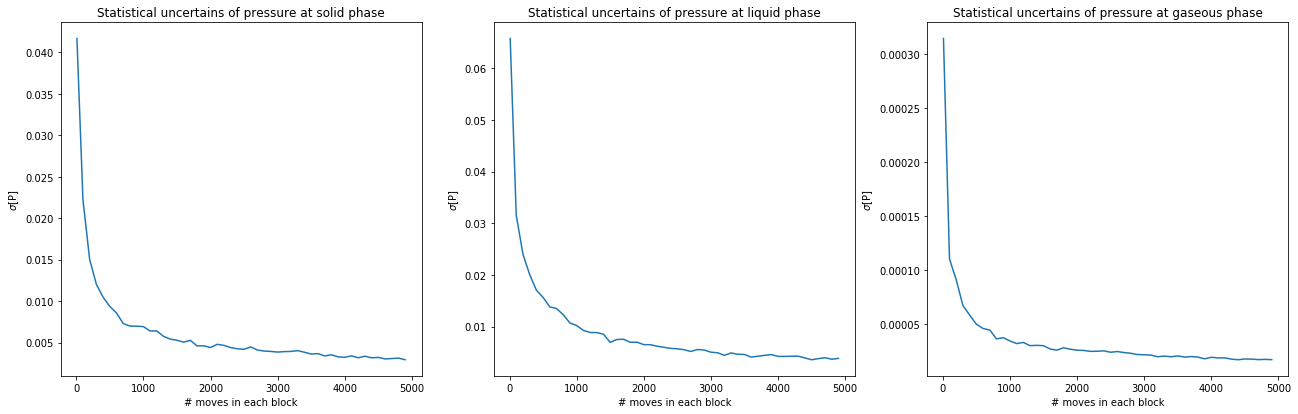

In [5]:
plt.figure(figsize=[22,6.5])
plt.subplot(1,3,1)
plt.plot(L, sigmaPS)
plt.xlabel('# moves in each block')
plt.ylabel('$\sigma$[P]')
plt.title('Statistical uncertains of pressure at solid phase')
plt.subplot(1,3,2)
plt.plot(L, sigmaPL)
plt.xlabel('# moves in each block')
plt.ylabel('$\sigma$[P]')
plt.title('Statistical uncertains of pressure at liquid phase')
plt.subplot(1,3,3)
plt.plot(L, sigmaPG)
plt.xlabel('# moves in each block')
plt.ylabel('$\sigma$[P]')
plt.title('Statistical uncertains of pressure at gaseous phase')
plt.show()

### Scelta del numero di mosse per blocco

i parametri di tempo delle autocorrelazioni, fittate con funzioni esponenziali, sono stampati sotto i relativi grafici; per la fase solida, sia per energia potenziale sia per la pressione il tempo MC necessario a produrre due misure scorrelate è di circa 8/9 step; il risultato è peggiore per la fase liquida, tra i 10 e i 13 step, e molto migliore per la fase gassosa, non superiore ai 3 step. Tenendo conto di questi risultati, studiamo l'andamento dell'incertezza statistica; fissando a 100 il numero dei blocchi, ho riportato in grafico l'incertezza statistica sull'ultima stima di data blocking, in funzione del numero di step in ogni blocco; sia per energia potenziale che per pressione, a tutte e tre le fasi, l'andamento è identico e mostra una caduta esponenziale che satura ad un valore minimo; la saturazione inizia poco prima di L=1000, e diventa evidente a L $\sim$ 2000.

Ho scelto quindi di utilizzare 2000 step per blocco per le fasi solida: con $\tau_c \sim 10$, abbiamo $\sim$ 200 misure indipendenti (qualcuna in più perchè $\tau_c$ è minore di 10);

Poichè per la fase liquida $\tau_c$ è leggermente maggiore, ho scelto di usare 2500 step per blocco, in modo da avere ancora $\sim$ 200 misure indipendenti in ogni blocco.

Alla fase gassosa le misure si scorrelano molto più velocemente, ma visto l'andamento dell'incertezza statistica ho scelto di usare 1500 step per blocco.

### Exercise 07.2

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the Monte Carlo NVT code</span> we have provided: average value of $g(r)$ in each block (with output in the file: output.gofr.0), final average value of $g(r)$ with statistical uncertainties (with output in the file: output.gave.0).

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, inside the previously used Molecular Dynamics code</span>.

### Exercise 07.4

By means of your upgraded MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in SI units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

### Confronto tra i due metodi di sampling

#### Solid phase

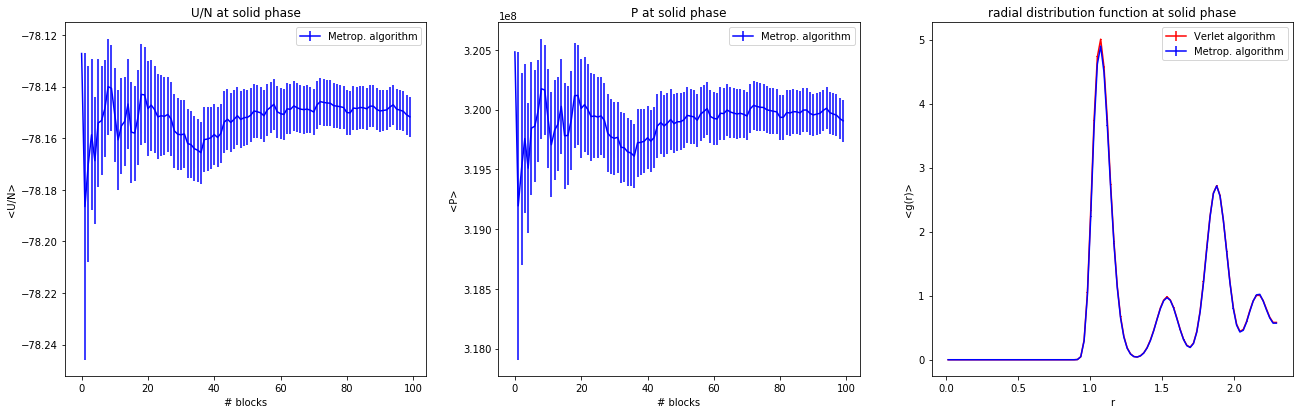

In [4]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Lx = np.arange(0,100)

epsk = 120                            #in Kelvin
sigma = 3.4 * (1/(10**(10)))          #in metri
Boltz = 1.380649 * (1/(10**(23)))     #in Joule/Kelvin
eps = epsk*Boltz*((10**(22))/(1.6))   #in meV
eps2 = epsk*Boltz                     #in Joule
f = eps2/(sigma**3)                    #in Pascal

Verlet_GS = np.loadtxt('data_Verlet/solid/ave_radial.dat')
Verlet_GSs = np.loadtxt('data_Verlet/solid/err_radial.dat')
Metro_ES = np.loadtxt('data_Metropolis/solid/output.epot.0').T
Metro_PS = np.loadtxt('data_Metropolis/solid/output.pres.0').T
Metro_GS = np.loadtxt('data_Metropolis/solid/output.gave.0').T

Metro_ES[2] *= eps
Metro_ES[3] *= eps
Metro_PS[2] *= f
Metro_PS[3] *= f

plt.figure(figsize=[22,6.5])
plt.subplot(1,3,1)
plt.errorbar(Lx, Metro_ES[2], yerr=Metro_ES[3], color='b', label='Metrop. algorithm')
plt.xlabel('# blocks')
plt.ylabel('<U/N>')
plt.title('U/N at solid phase')
plt.legend()
plt.subplot(1,3,2)
plt.errorbar(Lx, Metro_PS[2], yerr=Metro_PS[3], color='b', label='Metrop. algorithm')
plt.xlabel('# blocks')
plt.ylabel('<P>')
plt.title('P at solid phase')
plt.legend()
plt.subplot(1,3,3)
plt.errorbar(Metro_GS[0], Verlet_GS, yerr=Verlet_GSs, color='r', label='Verlet algorithm')
plt.errorbar(Metro_GS[0], Metro_GS[1], yerr=Metro_GS[2], color='b', label='Metrop. algorithm')
plt.xlabel('r')
plt.ylabel('<g(r)>')
plt.title('radial distribution function at solid phase')
plt.legend()
plt.show()


#### Liquid phase

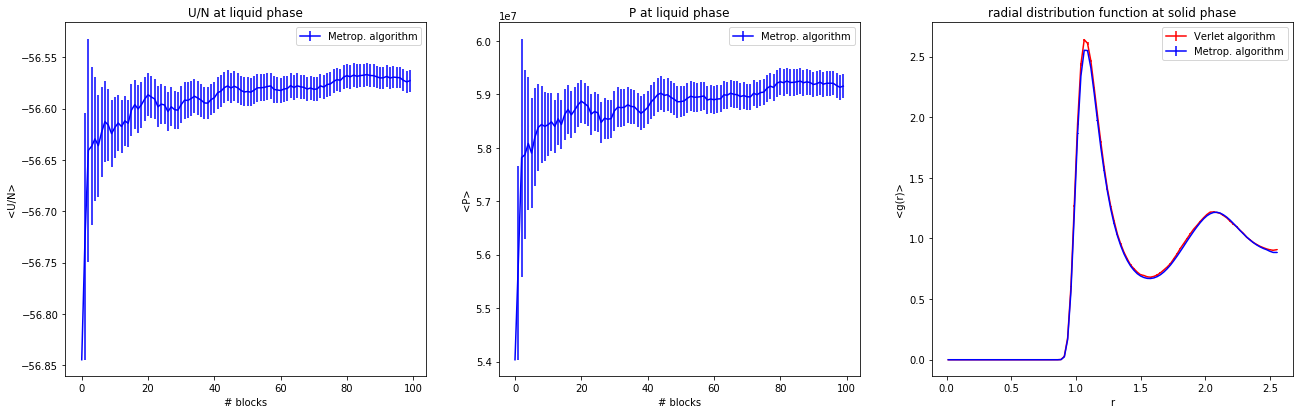

In [5]:
Verlet_GL = np.loadtxt('data_Verlet/liquid/ave_radial.dat')
Verlet_GLs = np.loadtxt('data_Verlet/liquid/err_radial.dat')
Metro_EL = np.loadtxt('data_Metropolis/liquid/output.epot.0').T
Metro_PL = np.loadtxt('data_Metropolis/liquid/output.pres.0').T
Metro_GL = np.loadtxt('data_Metropolis/liquid/output.gave.0').T

Metro_EL[2] *= eps
Metro_EL[3] *= eps
Metro_PL[2] *= f
Metro_PL[3] *= f

plt.figure(figsize=[22,6.5])
plt.subplot(1,3,1)
plt.errorbar(Lx, Metro_EL[2], yerr=Metro_EL[3], color='b', label='Metrop. algorithm')
plt.xlabel('# blocks')
plt.ylabel('<U/N>')
plt.title('U/N at liquid phase')
plt.legend()
plt.subplot(1,3,2)
plt.errorbar(Lx, Metro_PL[2], yerr=Metro_PL[3], color='b', label='Metrop. algorithm')
plt.xlabel('# blocks')
plt.ylabel('<P>')
plt.title('P at liquid phase')
plt.legend()
plt.subplot(1,3,3)
plt.errorbar(Metro_GL[0], Verlet_GL, yerr=Verlet_GLs, color='r', label='Verlet algorithm')
plt.errorbar(Metro_GL[0], Metro_GL[1], yerr=Metro_GL[2], color='b', label='Metrop. algorithm')
plt.xlabel('r')
plt.ylabel('<g(r)>')
plt.title('radial distribution function at solid phase')
plt.legend()
plt.show()

#### Gaseous phase

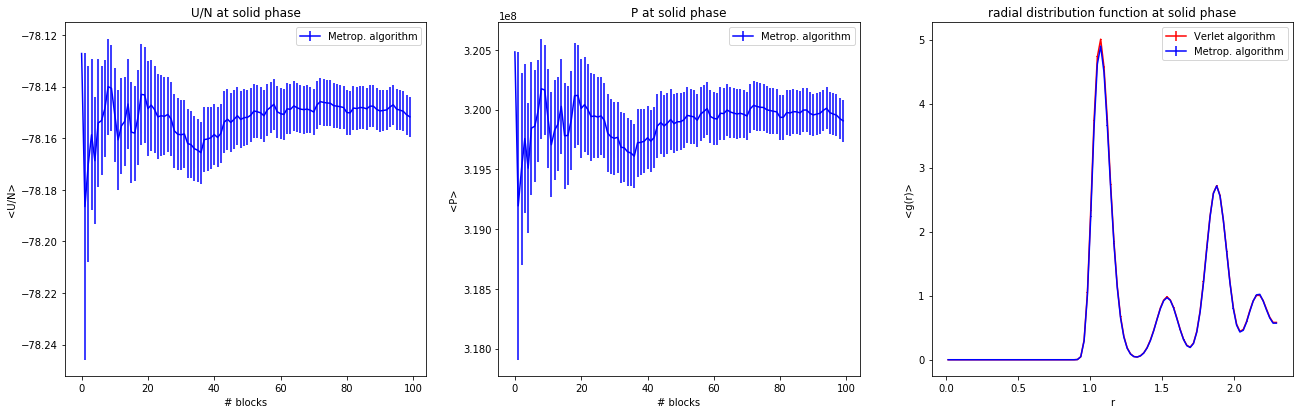

In [6]:
Verlet_GG = np.loadtxt('data_Verlet/gaseous/ave_radial.dat')
Verlet_GGs = np.loadtxt('data_Verlet/gaseous/err_radial.dat')
Metro_EG = np.loadtxt('data_Metropolis/gaseous/output.epot.0').T
Metro_PG = np.loadtxt('data_Metropolis/gaseous/output.pres.0').T
Metro_GG = np.loadtxt('data_Metropolis/gaseous/output.gave.0').T

Metro_EG[2] *= eps
Metro_EG[3] *= eps
Metro_PG[2] *= f
Metro_PG[3] *= f

plt.figure(figsize=[22,6.5])
plt.subplot(1,3,1)
plt.errorbar(Lx, Metro_ES[2], yerr=Metro_ES[3], color='b', label='Metrop. algorithm')
plt.xlabel('# blocks')
plt.ylabel('<U/N>')
plt.title('U/N at solid phase')
plt.legend()
plt.subplot(1,3,2)
plt.errorbar(Lx, Metro_PS[2], yerr=Metro_PS[3], color='b', label='Metrop. algorithm')
plt.xlabel('# blocks')
plt.ylabel('<P>')
plt.title('P at solid phase')
plt.legend()
plt.subplot(1,3,3)
plt.errorbar(Metro_GS[0], Verlet_GS, yerr=Verlet_GSs, color='r', label='Verlet algorithm')
plt.errorbar(Metro_GS[0], Metro_GS[1], yerr=Metro_GS[2], color='b', label='Metrop. algorithm')
plt.xlabel('r')
plt.ylabel('<g(r)>')
plt.title('radial distribution function at solid phase')
plt.legend()
plt.show()

#### Commenti

Il risultato per la funzione di distribuzione radiale è identico, per i diversi metodi di sampling, a tutte le fasi; i risultati per pressione ed energia potenziale sono minori rispetto a quelli ottenuti precedentemente; questo nuovo algoritmo applica le correzioni per le code delle distribuzioni, che sono tutti termini negativi, infatti il risultato ottenuto con l'algoritmo di Verlet, non corretto per le code, è sempre maggiore di quello ottenuto con l'algoritmo di Metropolis.

### Calcolo delle autocorrelazioni

In [9]:
'''
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import statsmodels.tsa.stattools as stat
import math

n=100
M=500000

Esolid = np.loadtxt("equi_solido/Ene_istant.dat")
Psolid = np.loadtxt("equi_solido/Pres_istant.dat")
Eliquid = np.loadtxt("equi_liquido/Ene_istant.dat")
Pliquid = np.loadtxt("equi_liquido/Pres_istant.dat")
Egas = np.loadtxt("equi_gas/Ene_istant.dat")
Pgas = np.loadtxt("equi_gas/Pres_istant.dat")

AcES = stat.acf(Esolid, fft=True, nlags=n-1)
AcPS = stat.acf(Psolid, fft=True, nlags=n-1)
AcEL = stat.acf(Eliquid, fft=True, nlags=n-1)
AcPL = stat.acf(Pliquid, fft=True, nlags=n-1)
AcEG = stat.acf(Egas, fft=True, nlags=n-1)
AcPG = stat.acf(Pgas, fft=True, nlags=n-1)

lag = np.arange(0, M, step=M/n)
ES = np.column_stack((lag, AcES))
PS = np.column_stack((lag, AcPS))
EL = np.column_stack((lag, AcEL))
PL = np.column_stack((lag, AcPL))
EG = np.column_stack((lag, AcEG))
PG = np.column_stack((lag, AcPG))

np.savetxt('Autocorr_ene_solid.dat', ES, delimiter=" " )
np.savetxt('Autocorr_ene_liquid.dat', EL, delimiter=" " )
np.savetxt('Autocorr_ene_gaseous.dat', EG, delimiter=" " )
np.savetxt('Autocorr_pres_solid.dat', PS, delimiter=" " )
np.savetxt('Autocorr_pres_liquid.dat', PL, delimiter=" " )
np.savetxt('Autocorr_pres_gaseous.dat', PG, delimiter=" " )
'''

'\nimport matplotlib\nimport matplotlib.pyplot as plt\nimport numpy as np\nfrom scipy.optimize import curve_fit\nimport statsmodels.tsa.stattools as stat\nimport math\n\nn=100\nM=500000\n\nEsolid = np.loadtxt("equi_solido/Ene_istant.dat")\nPsolid = np.loadtxt("equi_solido/Pres_istant.dat")\nEliquid = np.loadtxt("equi_liquido/Ene_istant.dat")\nPliquid = np.loadtxt("equi_liquido/Pres_istant.dat")\nEgas = np.loadtxt("equi_gas/Ene_istant.dat")\nPgas = np.loadtxt("equi_gas/Pres_istant.dat")\n\nAcES = stat.acf(Esolid, fft=True, nlags=n-1)\nAcPS = stat.acf(Psolid, fft=True, nlags=n-1)\nAcEL = stat.acf(Eliquid, fft=True, nlags=n-1)\nAcPL = stat.acf(Pliquid, fft=True, nlags=n-1)\nAcEG = stat.acf(Egas, fft=True, nlags=n-1)\nAcPG = stat.acf(Pgas, fft=True, nlags=n-1)\n\nlag = np.arange(0, M, step=M/n)\nES = np.column_stack((lag, AcES))\nPS = np.column_stack((lag, AcPS))\nEL = np.column_stack((lag, AcEL))\nPL = np.column_stack((lag, AcPL))\nEG = np.column_stack((lag, AcEG))\nPG = np.column_stack((

### Calcolo dell'incertezza statistica col data blocking in funzione del numero di blocchi

In [10]:
'''
import math

N = 100
L = np.arange(0,5000,100)
L[0] = 10

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)
    
def DB(r,N,L):
    ave = np.zeros(N)
    av2 = np.zeros(N)
    sum_prog = np.zeros(N)
    su2_prog = np.zeros(N)
    err_prog = np.zeros(N)

    for i in range(N):
        sum = 0
        for j in range(L-1):
            k = j+i*L
            sum += r[k]
        ave[i] = sum/L       # r_i 
        av2[i] = (ave[i])**2 # (r_i)^2 

    for i in range(N):
        for j in range(i+1):
            sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
            su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
        sum_prog[i]/=(i+1) # Cumulative average
        su2_prog[i]/=(i+1) # Cumulative square average
        err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    return err_prog[N-1]

stat_unc_ES = np.zeros(50)
stat_unc_EL = np.zeros(50)
stat_unc_EG = np.zeros(50)
stat_unc_PS = np.zeros(50)
stat_unc_PL = np.zeros(50)
stat_unc_PG = np.zeros(50)

for i in range(50):
    stat_unc_ES[i] = DB(Esolid, N,L[i])
    stat_unc_EL[i] = DB(Eliquid, N, L[i])
    stat_unc_EG[i] = DB(Egas, N,L[i])
    stat_unc_PS[i] = DB(Psolid, N, L[i])
    stat_unc_PL[i] = DB(Pliquid, N,L[i])
    stat_unc_PG[i] = DB(Pgas, N, L[i])
    
np.savetxt('Uncertain_ene_solid.dat', stat_unc_ES, delimiter=" " )
np.savetxt('Uncertain_ene_liquid.dat', stat_unc_EL, delimiter=" " )
np.savetxt('Uncertain_ene_gaseous.dat', stat_unc_EG, delimiter=" " )
np.savetxt('Uncertain_pres_solid.dat', stat_unc_PS, delimiter=" " )
np.savetxt('Uncertain_pres_liquid.dat', stat_unc_PL, delimiter=" " )
np.savetxt('Uncertain_pres_gaseous.dat', stat_unc_PG, delimiter=" " )
'''

'\nimport math\n\nN = 100\nL = np.arange(0,5000,100)\nL[0] = 10\n\ndef error(AV,AV2,n):  # Function for statistical uncertainty estimation\n    if n==0:\n        return 0\n    else:\n        return math.sqrt((AV2[n] - AV[n]**2)/n)\n    \ndef DB(r,N,L):\n    ave = np.zeros(N)\n    av2 = np.zeros(N)\n    sum_prog = np.zeros(N)\n    su2_prog = np.zeros(N)\n    err_prog = np.zeros(N)\n\n    for i in range(N):\n        sum = 0\n        for j in range(L-1):\n            k = j+i*L\n            sum += r[k]\n        ave[i] = sum/L       # r_i \n        av2[i] = (ave[i])**2 # (r_i)^2 \n\n    for i in range(N):\n        for j in range(i+1):\n            sum_prog[i] += ave[j] # SUM_{j=0,i} r_j\n            su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2\n        sum_prog[i]/=(i+1) # Cumulative average\n        su2_prog[i]/=(i+1) # Cumulative square average\n        err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty\n    return err_prog[N-1]\n\nstat_unc_ES = np.zeros(50)\nstat_unc_EL = 